In [1]:
%pylab inline
import pandas as pd
import scipy
%load_ext autoreload
%autoreload 2
from analysis_toolbox import *

Populating the interactive namespace from numpy and matplotlib


- reran ``python -i qualityBaseline.py`` to get an updated ``computed_myCOCO_BBvals.csv`` table after correcting a COCO mismatch
- ran ``python -i compute_fittings.py f`` and ``python -i compute_fittings.py overall``

In [2]:
overall_fit = pd.read_csv("overall_fit_results.csv", index_col=0)
overall_fit.replace([np.inf, -np.inf], np.nan)
overall_fit=overall_fit.dropna()
# overall_fit.groupby(['metric','Function Name'])['RSS'].apply(mean)

In [3]:
# WRONG 
# overall_fit.groupby("metric").min().reset_index()
# overall_fit[overall_fit["metric"]=="Precision [COCO]"][overall_fit["Function Name"]=="alpha"]

In [48]:
idx = overall_fit.groupby(['metric'])['RSS'].transform(min) ==overall_fit["RSS"]
overall_fit[idx]

,metric,Function Name,Parameters,RSS,D-value,p-value
3,Precision [COCO],beta,"(94.919924084228128, 0.96961007899344487, -7.8...",9.113931,0.48,1.022699e-05
133,Recall [COCO],loggamma,"(0.048134730912252441, 0.99796670550068656, 0....",4.562850,0.46,2.763769e-05
200,Jaccard [COCO],gompertz,"(0.0022885074010021928, 0.45747280857837092, 0...",13.312855,0.46,2.763769e-05
259,NME [COCO],cauchy,"(0.98158830468617631, 0.0086535853767709288)",51.670082,0.84,1.248758e-16
378,Num Points,johnsonsb,"(1.7890646335467597, 0.87268360052911731, 2.57...",0.000239,1.00,2.164688e-23
463,Precision [Self],johnsonsu,"(5.358804273321673, 0.84824230989816773, 1.004...",6.024519,0.34,4.427949e-03
547,Recall [Self],johnsonsu,"(5.6725631100216223, 0.91027614571104043, 1.00...",5.069996,0.42,1.777837e-04
631,Jaccard [Self],johnsonsu,"(1.6767962031564858, 0.97211028378686459, 0.96...",4.567728,0.28,3.166085e-02
714,NME [Self],johnsonsb,"(-6.111371404792628, 1.0551181747996736, -7.16...",30.340145,0.74,5.309437e-13
783,Area Ratio,gengamma,"(4.8615892195166275, 0.3504709888371087, 0.000...",27.142858,0.34,4.427949e-03


In [56]:
print tabulate(overall_fit[idx].drop(['Parameters'],axis=1),showindex="False",headers='keys',tablefmt='latex',floatfmt='.3g')

\begin{tabular}{llrrr}
\hline
 metric           & Function Name   &       RSS &   D-value &   p-value \\
\hline
 Precision [COCO] & beta            &  9.11     &      0.48 &  1.02e-05 \\
 Recall [COCO]    & loggamma        &  4.56     &      0.46 &  2.76e-05 \\
 Jaccard [COCO]   & gompertz        & 13.3      &      0.46 &  2.76e-05 \\
 NME [COCO]       & cauchy          & 51.7      &      0.84 &  1.25e-16 \\
 Num Points       & johnsonsb       &  0.000239 &      1    &  2.16e-23 \\
 Precision [Self] & johnsonsu       &  6.02     &      0.34 &  0.00443  \\
 Recall [Self]    & johnsonsu       &  5.07     &      0.42 &  0.000178 \\
 Jaccard [Self]   & johnsonsu       &  4.57     &      0.28 &  0.0317   \\
 NME [Self]       & johnsonsb       & 30.3      &      0.74 &  5.31e-13 \\
 Area Ratio       & gengamma        & 27.1      &      0.34 &  0.00443  \\
\hline
\end{tabular}


In [5]:
overall_fit[overall_fit["metric"]=="Precision [COCO]"][overall_fit["Function Name"]=="beta"]

/Users/dorislee/.virtualenvs/py27dev/lib/python2.7/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


,metric,Function Name,Parameters,RSS,D-value,p-value
3,Precision [COCO],beta,"(94.919924084228128, 0.96961007899344487, -7.8...",9.113931,0.48,0.00001


In [25]:
# ji_fit =test_all_Ji_fit_fcn(fcns_to_test=['norm','johnsonsu','exponpow','t','genpareto'],RAND_SAMPLING=False)

In [22]:
ji_fit = pd.read_csv("Ji_fit_results.csv", index_col=0)
ji_fit.replace([np.inf, -np.inf], np.nan)
ji_fit=ji_fit.dropna()
grouped_ji_fit = ji_fit.groupby(['metric','Function'])['RSS'].apply(mean).reset_index()
idx = grouped_ji_fit.groupby(['metric'])['RSS'].transform(min) ==grouped_ji_fit["RSS"]
grouped_ji_fit[idx]

,metric,Function,RSS
2,Area Ratio,johnsonsu,273751.492666
7,Jaccard [COCO],johnsonsu,675.650556
12,Jaccard [Self],johnsonsu,282.813984
17,NME [COCO],johnsonsu,27439.865281
22,NME [Self],johnsonsu,10812.981946
27,Num Points,johnsonsu,0.065861
32,Precision [COCO],johnsonsu,4570.240080
37,Precision [Self],johnsonsu,1414.982196
42,Recall [COCO],johnsonsu,452.793279
47,Recall [Self],johnsonsu,1145.609356


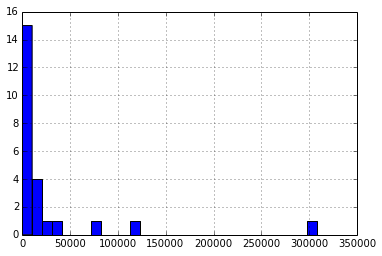

In [14]:
ji_fit[ji_fit["metric"]=="NME [COCO]"][ji_fit["Function"]=="johnsonsu"]['RSS'].hist(bins=30)

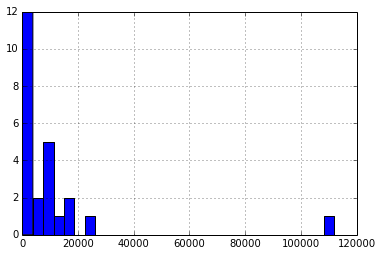

In [15]:
ji_fit[ji_fit["metric"]=="NME [Self]"][ji_fit["Function"]=="johnsonsu"]['RSS'].hist(bins=30)

Since the RSS averages are large, we see that there are quite a few outliers, we should examine these objects and filter them out if necccesary 

In [16]:
ji_fit[ji_fit["metric"]=="NME [Self]"][ji_fit["Function"]=="johnsonsu"][ji_fit["RSS"]>8e4]

,object_id,Function,metric,Mean,SD,RSS,D-value,p-value
41,6,johnsonsu,NME [Self],0.624676,1.315428,111964.771743,1,1.797255e-14


/Users/dorislee/.virtualenvs/py27dev/lib/python2.7/site-packages/pandas/io/parsers.py:648: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skip_footer; you can avoid this warning by specifying engine='python'.
  ParserWarning)
/Users/dorislee/.virtualenvs/py27dev/lib/python2.7/site-packages/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


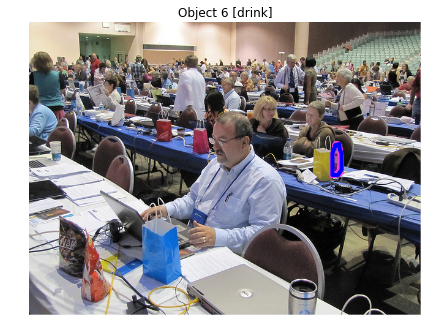

In [17]:
visualize_bb_objects(6)

this is a bit weird that the numbers are so large 

In [18]:
ji_fit[ji_fit["metric"]=="NME [COCO]"][ji_fit["Function"]=="johnsonsu"][ji_fit["RSS"]>5e4]

,object_id,Function,metric,Mean,SD,RSS,D-value,p-value
16,6,johnsonsu,NME [COCO],10.311748,3.488976,308454.448744,1,1.797255e-14
166,11,johnsonsu,NME [COCO],7.987815,1.733827,77456.461825,1,1.797255e-14
1116,44,johnsonsu,NME [COCO],6.273457,1.361528,116935.176049,1,1.797255e-14


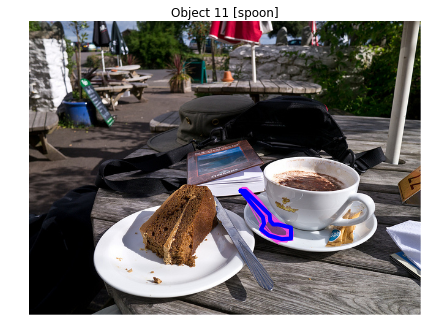

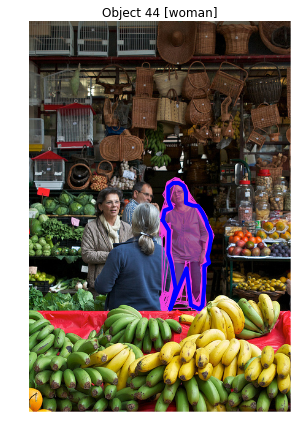

In [19]:
visualize_bb_objects(11)
visualize_bb_objects(44)

~~Maybe the  Munkres matching is wrong for the objects?  These look like good BBs.~~

I think that johnsonsu may just not be a good fit for these distributions, we are only trying 5 distributions, so johnsonsu is the best fit, but only out of the 5 fits, one thing we could do is to increase the number of functions that we are fitting against. while eliminating the distributions that are very bad for most things 

In [23]:
idx = grouped_ji_fit.groupby(['metric'])['RSS'].transform(max) ==grouped_ji_fit["RSS"]
grouped_ji_fit[idx]

,metric,Function,RSS
1,Area Ratio,genpareto,989396.612418
6,Jaccard [COCO],genpareto,1822.317783
11,Jaccard [Self],genpareto,1004.888703
16,NME [COCO],genpareto,92847.385604
21,NME [Self],genpareto,62558.351198
25,Num Points,exponpow,0.083868
30,Precision [COCO],exponpow,17104.842967
36,Precision [Self],genpareto,3793.328717
41,Recall [COCO],genpareto,2018.025429
46,Recall [Self],genpareto,3095.600826


In [24]:
fit_results =test_all_Ji_fit_fcn(fcns_to_test=['norm','johnsonsu','t','johnsonsb','cauchy','beta','loggamma','gompertz','gengamma'],RAND_SAMPLING=False)

  0%|          | 0/24 [00:00<?, ?it/s]/Users/dorislee/.virtualenvs/py27dev/lib/python2.7/site-packages/scipy/optimize/minpack.py:237: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
 50%|█████     | 12/24 [01:28<01:28,  0.14it/s]/Users/dorislee/.virtualenvs/py27dev/lib/python2.7/site-packages/scipy/optimize/minpack.py:237: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


In [26]:
ji_fit = pd.read_csv("Ji_fit_results.csv", index_col=0)
ji_fit.replace([np.inf, -np.inf], np.nan)
ji_fit=ji_fit.dropna()
grouped_ji_fit = ji_fit.groupby(['metric','Function'])['RSS'].apply(mean).reset_index()
idx = grouped_ji_fit.groupby(['metric'])['RSS'].transform(min) ==grouped_ji_fit["RSS"]
grouped_ji_fit[idx]

,metric,Function,RSS
5,Area Ratio,johnsonsu,273751.492666
14,Jaccard [COCO],johnsonsu,675.650556
19,Jaccard [Self],cauchy,250.418143
32,NME [COCO],johnsonsu,27439.865281
41,NME [Self],johnsonsu,10812.981946
46,Num Points,cauchy,0.064521
59,Precision [COCO],johnsonsu,4570.240080
68,Precision [Self],johnsonsu,1414.982196
77,Recall [COCO],johnsonsu,452.793279
81,Recall [Self],beta,902.613343


In [38]:
print tabulate(grouped_ji_fit[idx],showindex="False",headers='keys',tablefmt='latex',floatfmt='.2f')

\begin{tabular}{llr}
\hline
 metric           & Function   &       RSS \\
\hline
 Area Ratio       & johnsonsu  & 273751.49 \\
 Jaccard [COCO]   & johnsonsu  &    675.65 \\
 Jaccard [Self]   & cauchy     &    250.42 \\
 NME [COCO]       & johnsonsu  &  27439.87 \\
 NME [Self]       & johnsonsu  &  10812.98 \\
 Num Points       & cauchy     &      0.06 \\
 Precision [COCO] & johnsonsu  &   4570.24 \\
 Precision [Self] & johnsonsu  &   1414.98 \\
 Recall [COCO]    & johnsonsu  &    452.79 \\
 Recall [Self]    & beta       &    902.61 \\
\hline
\end{tabular}


If we look at the johnsonsu distribution fits, it is not too much worse than the best fit ones. 

In [32]:
grouped_ji_fit[grouped_ji_fit["Function"]=='johnsonsu']

,metric,Function,RSS
5,Area Ratio,johnsonsu,273751.492666
14,Jaccard [COCO],johnsonsu,675.650556
23,Jaccard [Self],johnsonsu,282.813984
32,NME [COCO],johnsonsu,27439.865281
41,NME [Self],johnsonsu,10812.981946
50,Num Points,johnsonsu,0.065861
59,Precision [COCO],johnsonsu,4570.240080
68,Precision [Self],johnsonsu,1414.982196
77,Recall [COCO],johnsonsu,452.793279
86,Recall [Self],johnsonsu,1145.609356


If we take a look at the rankings (sorted by increasing RSS) , the differences between the RSS between different rankings is pretty subtle. We could see that some metrics just generally have larger RSS than others, the values within each metric is consistent, this tells us that some of these metrics are just hard to be described parametrically.

In [34]:
grouped_ji_fit.sort(columns='RSS')

,metric,Function,RSS
46,Num Points,cauchy,0.064521
50,Num Points,johnsonsu,0.065861
53,Num Points,t,0.065959
49,Num Points,johnsonsb,0.068809
45,Num Points,beta,0.070197
52,Num Points,norm,0.071170
51,Num Points,loggamma,0.071313
48,Num Points,gompertz,0.074809
47,Num Points,gengamma,0.153887
19,Jaccard [Self],cauchy,250.418143


Try filtering out the outliers 

In [62]:
grouped_ji_fit = ji_fit[ji_fit["RSS"]<5e4].groupby(['metric','Function'])['RSS'].apply(mean).reset_index()
idx = grouped_ji_fit.groupby(['metric'])['RSS'].transform(min) ==grouped_ji_fit["RSS"]
grouped_ji_fit[idx]

,metric,Function,RSS
1,Area Ratio,cauchy,14836.098026
14,Jaccard [COCO],johnsonsu,675.650556
19,Jaccard [Self],cauchy,250.418143
32,NME [COCO],johnsonsu,7414.794292
41,NME [Self],johnsonsu,6415.078042
46,Num Points,cauchy,0.064521
56,Precision [COCO],gengamma,2300.733629
68,Precision [Self],johnsonsu,1414.982196
77,Recall [COCO],johnsonsu,452.793279
81,Recall [Self],beta,902.613343


We can conduct separate analysis based on 3  different errors

In [580]:
task_ambiguity = [1,4,8,10,18,20,22,27,28,29,30,31,32,33,35,40,42]
small_area = [1,15,22]
high_numPts=[5,7,9,10,11,12,28,29,30,37]